In [29]:
%run ../scripts/bls_wikidata_matchup.py

In [30]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [32]:
np.corrcoef(np.array(bls_wd.bls_total), np.array(bls_wd.wd_total))

array([[ 1.        , -0.00959268],
       [-0.00959268,  1.        ]])

It is interesting to note that the number of biographies as not correlated with number of people in BLS but the percentage of women in the area are correlated with the percentage of women in BLS. Another interesting research question can be **"Who gets to have a biography on wikipedia"**

In [33]:
X = bls_wd.bls_total
X = sm.add_constant(X)
Y = bls_wd.wd_total

model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               wd_total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                  0.003957
Date:                Fri, 11 Dec 2015   Prob (F-statistic):              0.950
Time:                        17:29:38   Log-Likelihood:                -500.34
No. Observations:                  45   AIC:                             1005.
Df Residuals:                      43   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7458.5720   3299.266      2.261      0.0

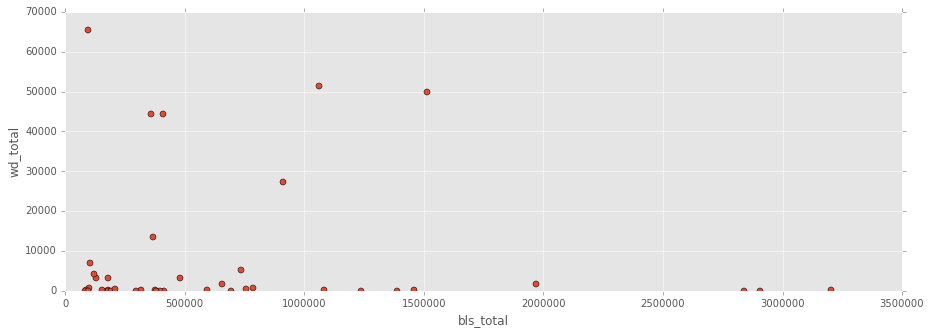

In [34]:
plt.plot(bls_wd.bls_total, bls_wd.wd_total,  'o')
plt.xlabel('bls_total')
plt.ylabel('wd_total')

In [35]:
np.corrcoef(bls_wd.bls_p_women, bls_wd.wd_p_women)

array([[ 1.        ,  0.44728619],
       [ 0.44728619,  1.        ]])

In [36]:
X = bls_wd.bls_p_women
X = sm.add_constant(X)
Y = bls_wd.wd_p_women

model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             wd_p_women   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     10.75
Date:                Fri, 11 Dec 2015   Prob (F-statistic):            0.00207
Time:                        17:29:39   Log-Likelihood:                -190.00
No. Observations:                  45   AIC:                             384.0
Df Residuals:                      43   BIC:                             387.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.7775      4.713      0.589      

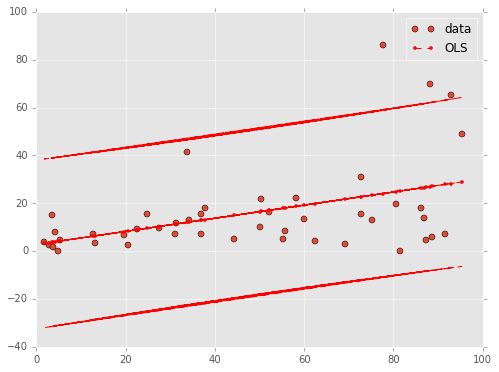

In [37]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))
x = bls_wd.bls_p_women
ax.plot(bls_wd.bls_p_women, bls_wd.wd_p_women,  'o', label="data")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [38]:
bls_wd.sort('wd_p_women')

/home/hargup/anaconda/envs/py3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bls_occupation,wd_occupation,bls_total,bls_p_women,wd_total,wd_women,wd_p_women
93,"Welding, soldering, and brazing workers","[miller, gunsmith, miner, shipbuilder]",593000,4.8,146,0,0.000000
38,Elementary and middle school teachers,[schoolmaster],2838000,81.4,41,0,0.000000
52,Machinists,"[locksmith, Tool and die maker, machinist]",397000,3.8,55,1,1.818182
18,Clergy,"[Rosh yeshiva, religious servant, saint, clerg...",408000,20.5,44425,1125,2.532358
22,Construction laborers,[construction worker],1387000,2.9,36,1,2.777778
6,Bill and account collectors,[treasurer],206000,69.1,33,1,3.030303
40,"Engineers, all other","[business engineering, engineer]",359000,13.2,44260,1462,3.303208
37,Electricians,"[technics, electrician]",692000,1.8,53,2,3.773585
83,"Tax examiners and collectors, and revenue agents",[statutory auditor],82000,62.4,24,1,4.166667
88,Tellers,[bank teller],380000,87.3,42,2,4.761905


In [39]:
bls_wd.sort('bls_p_women')

/home/hargup/anaconda/envs/py3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bls_occupation,wd_occupation,bls_total,bls_p_women,wd_total,wd_women,wd_p_women
37,Electricians,"[technics, electrician]",692000,1.8,53,2,3.773585
22,Construction laborers,[construction worker],1387000,2.9,36,1,2.777778
42,Firefighters,[firefighter],295000,3.4,46,7,15.217391
52,Machinists,"[locksmith, Tool and die maker, machinist]",397000,3.8,55,1,1.818182
0,Aircraft pilots and flight engineers,"[astronaut, aviator, navigator]",129000,4.1,3239,260,8.027169
93,"Welding, soldering, and brazing workers","[miller, gunsmith, miner, shipbuilder]",593000,4.8,146,0,0.000000
35,Driver/sales workers and truck drivers,"[co-driver, driver, salesperson]",3201000,5.4,124,6,4.838710
67,Police and sheriff’s patrol officers,"[executioner, park ranger, law enforcement off...",657000,12.6,1584,112,7.070707
40,"Engineers, all other","[business engineering, engineer]",359000,13.2,44260,1462,3.303208
81,"Software developers, applications and systems ...",[video game developer],1084000,19.7,103,7,6.796117
